# Mask-wearing Behaviours and COVID Cases in UK

Since the beginning of the pandemic, wearing a mask in public spaces has become a normal practice around the world. However, there has been notable changes in general public's tendency of following guidelines of mask-wearing. In this project, the changes in people's mask-wearing behaviours in the UK will be examined, as well as how it is associated with the number of COVID cases.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

The mask-wearing behavioural data is obtained from the **Imperial College London YouGov Covid 19 Behaviour Tracker Data GitHub**, which contains survey data on people's attitudes and behaviours in response to the pandemic.

In [2]:
#Loading the UK data
uk = pd.read_csv("united-kingdom.csv")
uk

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,5,41,81,90,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,RecordNo,endtime,qweek,i1_health,i2_health,i7a_health,i3_health,i4_health,i5_health_1,i5_health_2,i5_health_3,i5_health_4,i5_health_5,i5_health_99,i5a_health,i6_health,i7b_health,i8_health,i9_health,i10_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,i12_health_8,i12_health_9,i12_health_10,i12_health_11,i12_health_12,i12_health_13,i12_health_14,i12_health_15,i12_health_16,i12_health_17,i12_health_18,i12_health_19,...,WAH7_6,WAH7_7,WAH7_99,WAH6,V1_1,V1_2,V1_3,V1_98,V3_me,V3_me_other,V3_baby,V3_baby_other,V3_child2_4,V3_child2_4_other,V3_child5_17,V3_child5_17_other,V3_adult18,V3_adult18_other,V4_8,V4_9,V4_6,V4_98,V4_other,SC_1_1,SC_1_2,SC_1_3,SC_1_4,SC_1_5,SC_1_6,SC_1_7,SC_1_99,SC_2,SC_3_1,SC_3_2,SC_3_3,SC_3_4,SC_3_5,SC_3_6,SC_3_7,SC_3_99
0,1921,01/04/2020 17:42,week 1,3,2,1,"No, I have not","No, they have not",No,No,No,No,No,Yes,,,,,Yes,Somewhat easy,Very willing,Not at all,Always,Not at all,Always,Not at all,Frequently,Not at all,Always,Always,Always,Always,Always,Always,Always,Always,Frequently,Not at all,Not at all,Sometimes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1922,01/04/2020 17:42,week 1,3,0,2,"No, I have not","No, they have not",No,No,No,No,No,Yes,,,,,Yes,Very easy,Very willing,Not at all,Always,Always,Frequently,Sometimes,Sometimes,Not at all,Not at all,Not at all,Not at all,Always,Frequently,Frequently,Frequently,Always,Frequently,Not at all,Not at all,Sometimes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1923,01/04/2020 17:46,week 1,1,12,1,"No, I have not","No, they have not",No,No,No,No,No,Yes,,,,,Yes,Very easy,Very willing,Not at all,Always,Sometimes,Always,Always,Always,Always,Always,Always,,Not at all,Always,Always,Always,Always,Frequently,Always,Not at all,Always,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1924,01/04/2020 17:46,week 1,1,2,1,"No, I have not","No, they have not",No,No,No,No,No,Yes,,,,,Yes,Somewhat difficult,Somewhat willing,Frequently,Always,Frequently,Always,Always,Frequently,Always,Always,Not at all,Always,Always,Always,Always,Always,Always,Frequently,Not at all,Not at all,Always,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1925,01/04/2020 17:46,week 1,2,0,1,"No, I have not","No, they have not",No,No,No,No,No,Yes,,,,,Yes,Somewhat difficult,Very willing,Not at all,Frequently,Sometimes,Always,Always,Frequently,Always,Always,Sometimes,Always,Always,Always,Always,Always,Always,Sometimes,Not at all,Not at all,Rarely,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55420,57341,23/11/2021 09:55,week 54,,3,,,,,,,,,,,,,,Yes,,Very willing,Always,Always,Always,Always,Always,Always,Always,Always,Always,,Always,Always,Always,Always,Always,Always,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
55421,57342,23/11/2021 09:57,week 54,,50,,,,,,,,,,,,,,Yes,,Very willing,Not at all,Frequently,Sometimes,Always,Not at all,Not at all,Not at all,Not at all,Not at all,,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
55422,57343,23/11/2021 10:05,week 54,,10,,,,,,,,,,,,,,Yes,,Very 

The survey contains a long list of questions, and for the purpose of this project we will focus on item *i12_health_1*, which asks respondents whether they have worn a face mask outside their home (e.g. when on public transport, going to a supermarket, going to a main road). Options include "Always", "Frequently", "Sometimes", "Rarely" and "Not at all".

Because the date data contains time information, a new date column is created to omit the time for later analysis.

In [3]:
#Turning the "endtime" column from a string to datetime
from datetime import date

uk['endtime'] = pd.to_datetime(uk["endtime"], format="%d/%m/%Y %H:%M") #Specifying the format of the data
uk['dateonly'] = uk["endtime"].dt.date #Extracting the date from datetime

Then, the number of respondents for each option on each date was examined.

In [4]:
#Number of response for each options, separated for each day
daily_mask_distribution = uk[["i12_health_1","dateonly"]].groupby(["dateonly","i12_health_1"]).size()

#Turning the subindex into a column in the dataframe
ukmaskdf = pd.DataFrame(daily_mask_distribution, columns =["Count"]).reset_index()
ukmaskdf.head(10)

,dateonly,i12_health_1,Count
0,2020-04-01,Always,80
1,2020-04-01,Frequently,46
2,2020-04-01,Not at all,919
3,2020-04-01,Rarely,36
4,2020-04-01,Sometimes,45
5,2020-04-02,Always,42
6,2020-04-02,Frequently,20
7,2020-04-02,Not at all,426
8,2020-04-02,Rarely,20
9,2020-04-02,Sometimes,16


Here, respondents are categorised as "maskers" if they responded that they "Always" or "Frequently" wear masks.

In [5]:
#Extracting "Always" and "Frequently" responses and summing the daily total
dailymaskwearer = ukmaskdf[ukmaskdf["i12_health_1"].isin(["Always","Frequently"])].groupby("dateonly").agg(sum)
dailymaskwearer

,Count
dateonly,
2020-04-01,126
2020-04-02,62
2020-04-07,123
2020-04-08,1
2020-04-09,5
...,...
2021-11-19,4
2021-11-20,4
2021-11-21,10


Because the number of responses on each day fluctuates, the relative proportion of maskers should be calculated for the responses on each day.

In [6]:
#Adding a column for the total number of response every day
dailymaskwearer["total"] = ukmaskdf.groupby("dateonly").agg(sum)

#% of maskers in the daily total response 
dailymaskwearer["masker_percentage"] = dailymaskwearer["Count"]/dailymaskwearer["total"]*100 
dailymaskwearer.head(30)

,Count,total,masker_percentage
dateonly,,,
2020-04-01,126,1126,11.190053
2020-04-02,62,524,11.832061
2020-04-07,123,909,13.531353
2020-04-08,1,43,2.325581
2020-04-09,5,48,10.416667
2020-04-15,77,576,13.368056
2020-04-16,72,393,18.320611
2020-04-17,6,34,17.647059
2020-04-21,129,908,14.207048


From the *masker_percentage* column, we can see that the results fluctuates greatly on a daily basis. Therefore, plotting the daily changes in the percentage of maskers may not give us useful information and may make the graph unecessarily noisy. Therefore, I try to see the changes in masking behaviour on a monthly basis.

In [7]:
dailymaskwearer["dateonly1"] = dailymaskwearer.index #Creating a temporary column of date from the index

#Turn the temporary column into datetime
from datetime import date

dailymaskwearer["dateonly1"] = pd.to_datetime(dailymaskwearer["dateonly1"], format="%Y-%m-%d") 
dailymaskwearer["month"] = dailymaskwearer["dateonly1"].dt.strftime('%Y-%m') #Extracting the year and month
dailymaskwearer.drop("dateonly1", axis=1) #Remove the temporary column

#Grouping the data by the month and calculate the monthly average % of masker
monthlyaverage = dailymaskwearer[["masker_percentage","month"]].groupby("month").mean()
monthlyaverage

,masker_percentage
month,
2020-04,14.372261
2020-05,26.566569
2020-06,36.658540
2020-07,52.246521
2020-08,71.679631
2020-09,81.244227
2020-10,80.721492
2020-11,77.198534
2020-12,83.467261


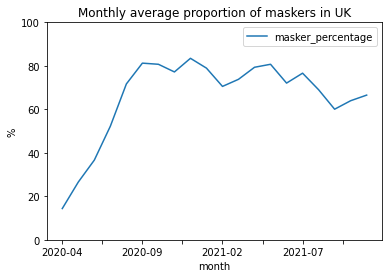

In [8]:
#Plotting the change in monthly average over time
dailymaskwearer[["masker_percentage","month"]].groupby("month").mean().plot()

#Labelling titles and axis
plt.title("Monthly average proportion of maskers in UK")
plt.xlabel("month")
plt.ylabel("%")
plt.ylim(0, 100); #Adjusting the limit of y-axis to show 0-100%

From the graph above, we can see that the monthly average % of maskers in the UK increased substantially from April 2020 to September 2020, reaching above 80%. However, the % has then been slowly decreasing and dropped to about 70% in the last few months.

After looking at the changes in mask-wearing behaviours, the COVID trend will be examined. The data is from the UK Government website.

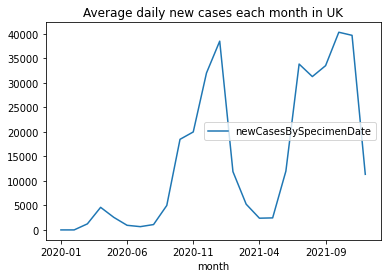

In [9]:
ukcases = pd.read_csv("data_2021-Dec-02.csv") #reading the data

#Sorting the number of new cases by "date" so that it goes from oldest to newest.
ukcases[["date","newCasesBySpecimenDate"]].sort_values(by = "date", ascending=True)

#Turning the "date" data into datetime format
ukcases["date"] = pd.to_datetime(ukcases["date"], format="%Y-%m-%d") #Specifying the format of the data
ukcases["month"] = ukcases["date"].dt.strftime('%Y-%m') #Extracting the month and year

#Calculating the monthly average new cases and sorting them from oldest to newest.
ukcasesmonthly = ukcases[["month","newCasesBySpecimenDate"]].sort_values(by = "month",ascending=True).groupby("month").mean()

#Creating a line plot of the average daily new cases in each month
ukcasesmonthly.plot()
plt.title("Average daily new cases each month in UK"); #Adding a title for the plot

From the graph above, it could be observed that the first peak of COVID in the UK was during late 2020 and early 2021, where the average daily new cases was about 40000.

To study the association between COVID cases and mask-wearing, the two dataframes of COVID cases and mask-wearing were merged.

In [10]:
#Merging the two dataframes, each on its index.
ukcases_joint = pd.merge(monthlyaverage, ukcasesmonthly,left_on=monthlyaverage.index, right_on=ukcasesmonthly.index)
ukcases_joint.rename(columns={"key_0": "month"},inplace = True) #Renaming the new month column
ukcases_joint

,month,masker_percentage,newCasesBySpecimenDate
0,2020-04,14.372261,4609.066667
1,2020-05,26.566569,2557.032258
2,2020-06,36.658540,942.866667
3,2020-07,52.246521,667.645161
4,2020-08,71.679631,1095.645161
5,2020-09,81.244227,4990.366667
6,2020-10,80.721492,18486.516129
7,2020-11,77.198534,19991.600000
8,2020-12,83.467261,32019.483871
9,2021-01,78.947525,38517.290323


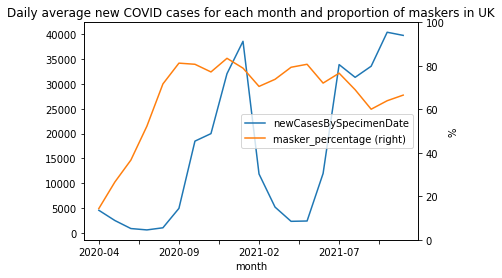

In [11]:
#Plotting the two sets of data on the same graph
fig,ax = plt.subplots() #Creating the figure

#Plotting the number of new cases from the merged dataframe
ukcases_joint.plot(x = 'month', y = 'newCasesBySpecimenDate', ax = ax)

#Plotting the % of maskers from the merged dataframe, specifying that the y-axis is secondary.
ukcases_joint.plot(x = 'month', y = 'masker_percentage', ax = ax, secondary_y = True)

#Labelling titles and axis
plt.title("Daily average new COVID cases for each month and proportion of maskers in UK")
plt.xlabel("month")
plt.ylabel("%")
plt.ylim(0, 100); #Adjusting the limit of y-axis to show 0-100%

From the graph above, we can see that the % of maskers rose quickly from April 2020 to September 2020 when the number of COVID cases was skyrocketing. The % of maskers started to drop around the time when COVID cases were dropping quickly, although the % of maskers were decreasing at a slower pace. However, during the second peak of COVID which started at around July 2021, the % of maskers continued to decrease. As the number of COVID cases continued to rise in late 2021, there has been a small increase in the % of maskers.

Based on the graph above, we cannot determine whether there is a causal relationship between the mask-wearing behaviour and COVID cases. Therefore, further studies on the two factors, e.g. comparing the number COVID cases and mask-wearing behaviours in different countries, may offer further insights into the relationship between the two.